In [ ]:
# load the autoreload extension for IPython
# This allows you to automatically reload modules before executing code
%load_ext autoreload
%autoreload 2

import sys
import os

# Add the parent directory to the system path
sys.path.append(os.path.abspath(os.path.join('..')))

# EDA for NVDA Historical Data

In [ ]:
from scripts.financial_analysis import FinancialDataAnalyzer
from scripts.utils import load_financial_data

In [3]:
#load data
stock_prefix = 'NVDA'
stock_data = load_financial_data(stock_prefix)

# show the first 5 rows of the stock data
stock_data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000,0.0,0.0
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000,0.0,0.0
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000,0.0,0.0
3,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000,0.0,0.0
4,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000,0.0,0.0


# Data Overview

In [4]:
# Display the shape of the DataFrame and check for missing values
print(f"Data shape: {stock_data.shape}")

# Check for missing values in the DataFrame
print("Missing values:")
print(stock_data.isnull().sum())

Data shape: (6421, 9)
Missing values:
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [5]:
analyzer = FinancialDataAnalyzer(stock_data, stock_prefix)
analyzer.change_to_datetime()

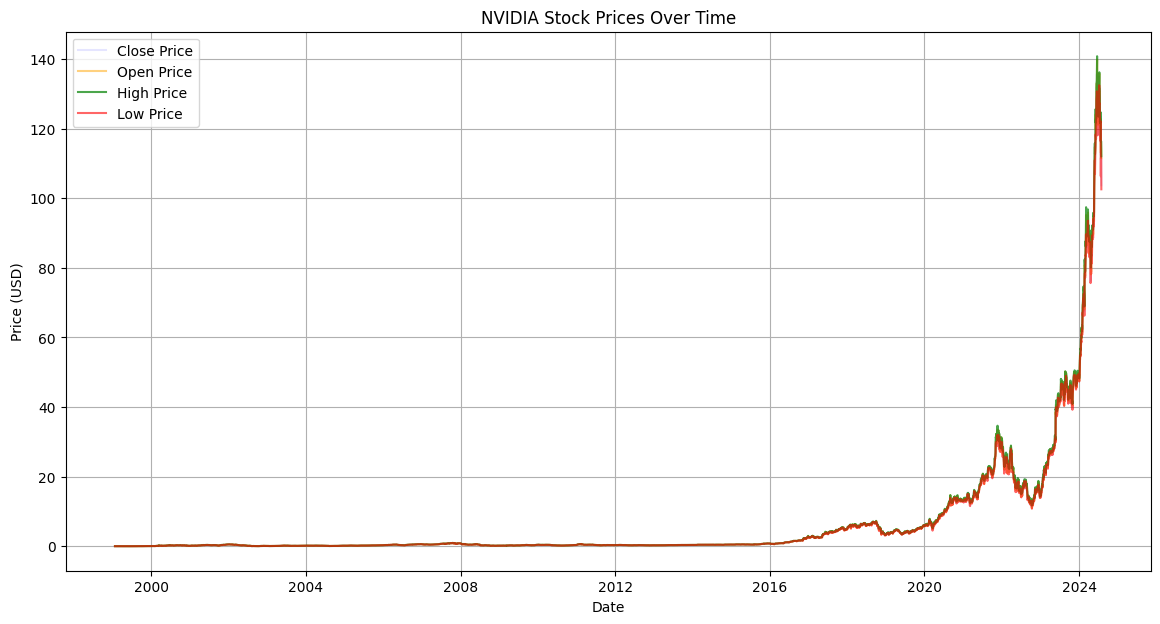

d:\active_repos\10_academy\Week-1-predicting-price-moves\.venv\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


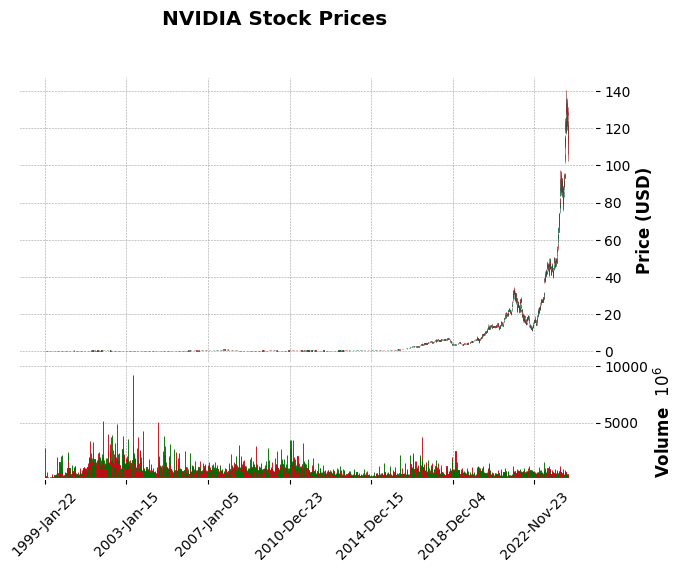

In [6]:
# Visualize stock price over time
analyzer.plot_stock_prices()

Stock Price Trend Analysis for NVIDIA:
Trend
Up           3309
Down         3059
No Change      53
Name: count, dtype: int64


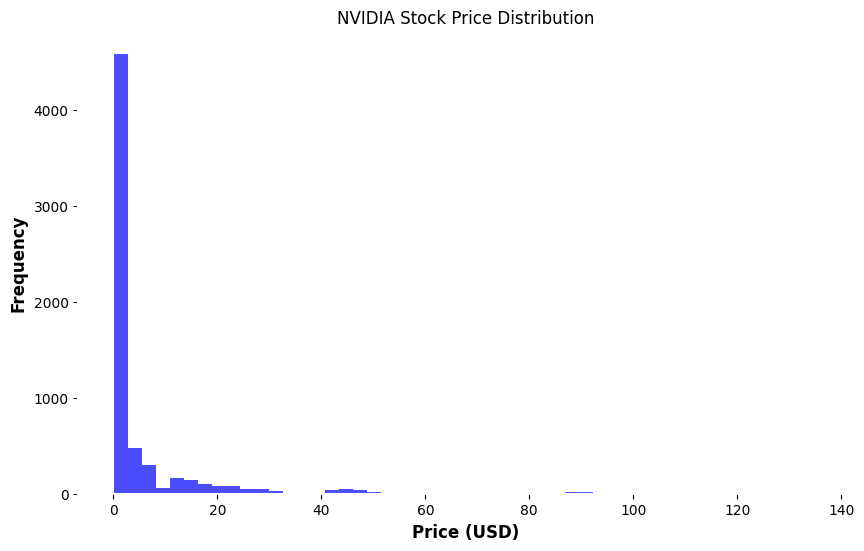

In [7]:
# Analyze stock price trends
analyzer.analyze_stock_price_trends()

# Visualize the distribution of stock prices
analyzer.visualize_stock_price_distribution()

# Technical Analysis Indicators with TA-Lib
This section demonstrates how to calculate and analyze common technical indicators such as Moving Averages, RSI, and MACD using TA-Lib on NVDA historical data.

In [8]:
# Calculate technical indicators
analyzer.calculate_technical_indicators()

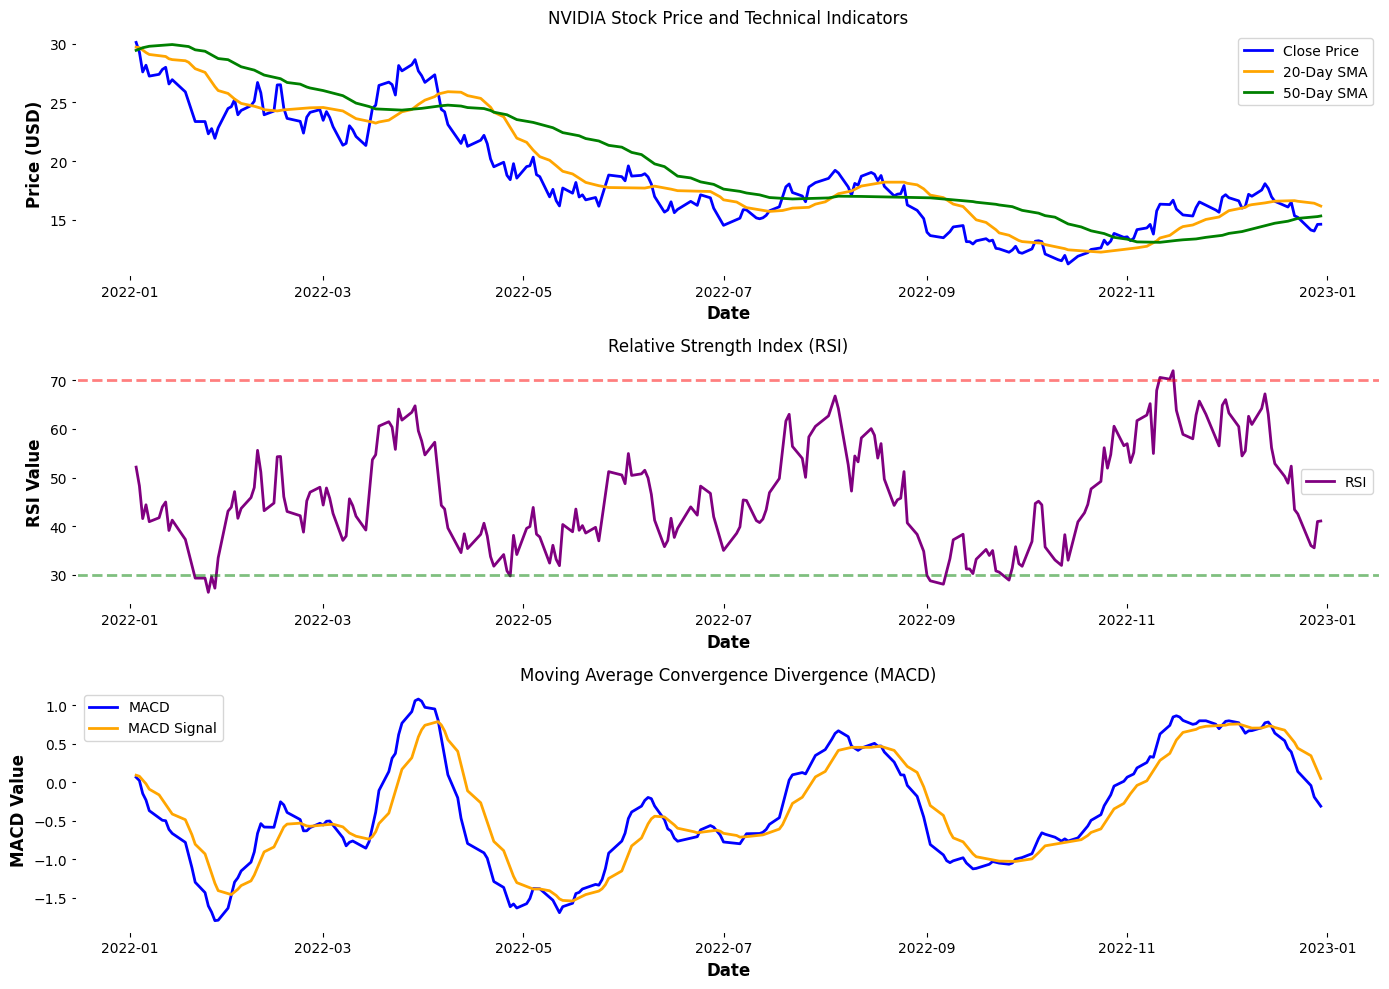

In [9]:
# Plot technical indicators
analyzer.plot_technical_indicators(start_date='2022-01-01', end_date='2022-12-31')